<a href="https://colab.research.google.com/github/Bareera2505/Deep-Learning-Labs/blob/main/lab4BM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Convolutional Neural Nets (CNNs)

## Example: CNN Implementation

## Assignment: LeNet5 Implementation

In [1]:
#Importing Libraries

# Load in relevant libraries, and alias where appropriate
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [2]:

#Loading the dataset and preprocessing

batch_size_train = 64 #Define train batch size
batch_size_test  = 64 #Define test batch size (can be larger than train batch size)

# Use the following code to load and normalize the dataset
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([torchvision.transforms.Resize((32, 32)),
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([torchvision.transforms.Resize((32, 32)),
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=batch_size_test, shuffle=True)



In [3]:
# Define relevant variables for the ML task
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 6

In [4]:
from torch.nn.modules.activation import Tanhshrink
#Defining the convolutional neural network
class LeNet5(nn.Module):

    def __init__(self):
        super(LeNet5, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [5]:
model = LeNet5()

#Setting the loss function
cost = nn.CrossEntropyLoss()

#Setting the optimizer with the model parameters and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#this is defined to print how many steps are remaining when training
total_step = len(train_loader)

In [6]:
#Training

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        images = images
        labels = labels
        
        #Forward pass
        outputs = model(images)
        loss = cost(outputs, labels)
        	
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        		
        if (i+1) % 400 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
        		           .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/6], Step [400/938], Loss: 0.2426
Epoch [1/6], Step [800/938], Loss: 0.0424
Epoch [2/6], Step [400/938], Loss: 0.0584
Epoch [2/6], Step [800/938], Loss: 0.0906
Epoch [3/6], Step [400/938], Loss: 0.0871
Epoch [3/6], Step [800/938], Loss: 0.0511
Epoch [4/6], Step [400/938], Loss: 0.0148
Epoch [4/6], Step [800/938], Loss: 0.0636
Epoch [5/6], Step [400/938], Loss: 0.0774
Epoch [5/6], Step [800/938], Loss: 0.0717
Epoch [6/6], Step [400/938], Loss: 0.0048
Epoch [6/6], Step [800/938], Loss: 0.0085


In [7]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
  
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images
        labels = labels
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
	 

Accuracy of the network on the 10000 test images: 98.61 %


In [8]:
import matplotlib.pyplot as plt
import numpy as np

#accuracy_list = np.zeros((num_epochs,))
#accuracy_list[epoch] = (correct/total).mean()
#train_loss_list = np.zeros((num_epochs,))

# plot test accuracy and training loss
#fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

#ax1.plot(accuracy_list,label='test accuracy')
#ax1.set_ylabel("test accuracy")
#ax1.legend()
#ax2.plot(train_loss_list,label='training loss')
#ax2.plot(val_loss_list,label='validation loss')
#ax2.legend()
#ax2.set_ylabel("training and validation loss")
#ax2.set_xlabel("epochs");
#fig.suptitle(f'Adam \n lr = 0.001 epochs = {num_epochs} \n Max Accuracy = {max(accuracy_list):.3f}')

In [9]:
# get images and labels for test set
imgs_test, labels_test = next(iter(test_loader))
with torch.no_grad():
  y_pred = model(imgs_test)

  # get guesses
guesses = torch.argmax(y_pred, dim=1)

# get probabilities
smax=nn.Softmax(dim=1)
probability,_ = torch.max(smax(y_pred),dim=1)

Text(0.5, 0.98, 'LeNet MNIST Classification Test Accuracy')

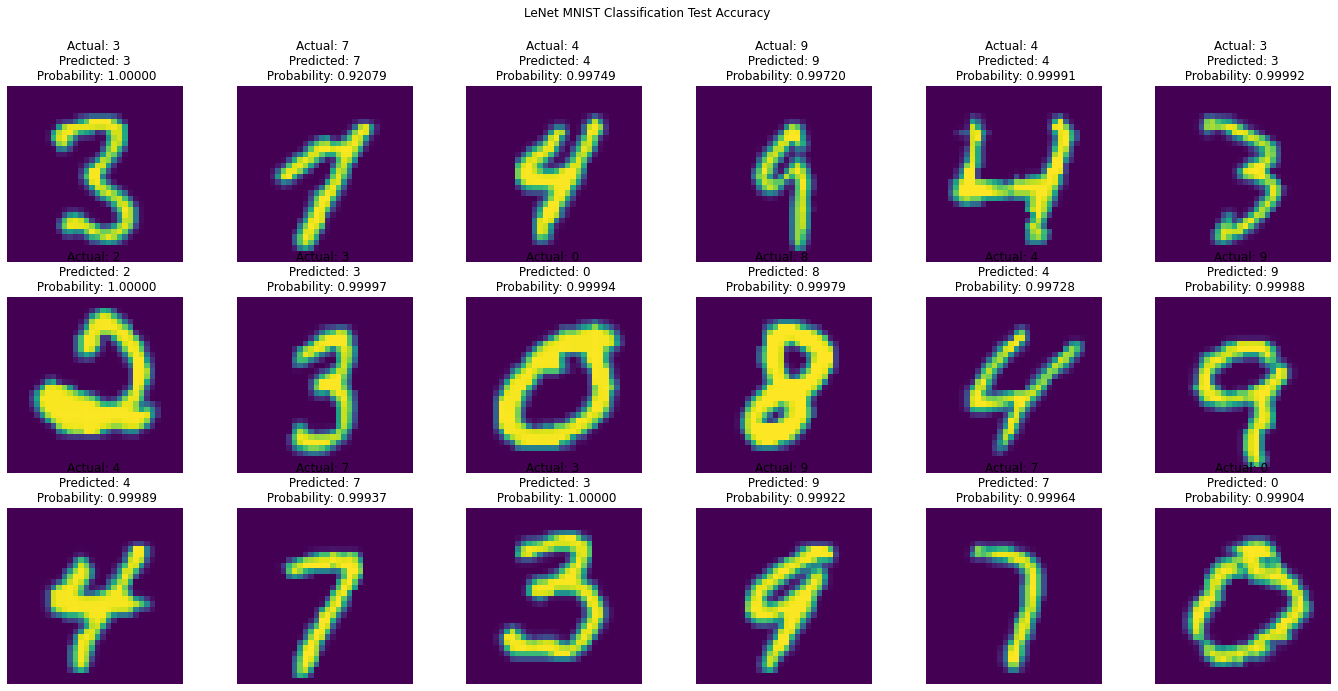

In [10]:
# plot classification accuracy
f,ax=plt.subplots(3,6,figsize=(24,11))
for i,(axs,predicted,true,prob) in enumerate(zip(ax.reshape(-1),guesses,labels_test,probability)):
  axs.imshow(imgs_test[i][0])
  axs.set_title(f'Actual: {true} \n Predicted: {predicted} \n Probability: {prob:0.5f}')
  axs.axis('off')
f.suptitle('LeNet MNIST Classification Test Accuracy')